Origen: DAN_PIC_Europe.DAN_PIC_TARGET_148CYC_1MIN
Incluye todas las tomas de medidas de tiendas 8 (148 ciclos con Murales de Carne y Pescado) del alcance del proyecto.
Fichero que hace un análisis exploratorio de las variables. 

In [1]:
!pip install --upgrade google-auth-oauthlib

Requirement already up-to-date: google-auth-oauthlib in /opt/conda/lib/python3.7/site-packages (0.4.1)


In [2]:
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud import storage

import pandas as pd

from dateutil.relativedelta import relativedelta


# TODO(developer): Set key_path to the path to the service account key
#                  file.
#key_path = "Credentials.json"

#credentials = service_account.Credentials.from_service_account_file(
#    key_path, scopes=["https://www.googleapis.com/auth/cloud-platform"],
#)

#client = bigquery.Client(credentials=credentials, project=credentials.project_id,)

In [3]:
#print(credentials.project_id)

mdona-cloud-labpri-ctrlsenales


In [3]:
query = """
SELECT * FROM mdona-cloud-lab-ctrlsenales.DAN_PIC_Europe.DAN_PIC_TARGET_148CYC_1MIN;

        """

client = bigquery.Client(location="EU", project="mdona-cloud-lab-ctrlsenales")


query_job = client.query(query,location="EU") 

df_Variables = query_job.to_dataframe()
df_Variables

,int64_field_0,ELEMENT,TS,TAG_SONDA_PB1,TAG_SONDA_PB2,TAG_PRESION_SATURACION,TAG_TEMP_ASPIRACION,TAG_RECALENT_VALVULA,TAG_APERT_VALVULA,TAG_PETICION_FRIO,TAG_DESCARCHE,cycle_number,RUL
0,1659468,103397.0,2019-04-05 11:06:00+00:00,1.450000,1.000000,0.956667,1.450000,10.700000,0.000000,0.0,1.0,117,127
1,1659487,103397.0,2019-04-05 11:25:00+00:00,0.180000,-3.150000,0.988333,1.238889,11.300000,57.700001,0.0,0.0,117,127
2,1659706,103397.0,2019-04-05 15:04:00+00:00,0.333333,-6.800000,0.831667,0.333333,12.700000,0.000000,0.0,0.0,117,123
3,1660149,103397.0,2019-04-05 22:27:00+00:00,0.718182,-0.266667,0.830000,0.561538,14.400000,0.000000,0.0,0.0,117,116
4,1660239,103397.0,2019-04-05 23:57:00+00:00,0.900000,0.666667,0.660000,0.900000,14.600000,0.000000,0.0,0.0,117,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2073744,2073561,153705.0,2020-05-02 14:07:00+00:00,7.800000,4.500000,1.253333,9.637500,17.000001,100.000000,1.0,0.0,148,3
2073745,2073604,153705.0,2020-05-02 14:50:00+00:00,2.350000,-0.200000,1.290000,3.450000,9.150000,100.000000,1.0,0.0,148,2
2073746,2073621,153705.0,2020-05-02 15:07:00+00:00,3.180000,1.008333,1.346667,5.966667,11.300000,100.000000,1.0,0.0,148,2
2073747,2073636,153705.0,2020-05-02 15:22:00+00:00,7.500000,6.750000,1.396667,9.333333,13.700000,100.000000,1.0,0.0,148,1


In [4]:
df_Backup=df_Variables

In [5]:
df_Variables.dtypes

int64_field_0                           int64
ELEMENT                               float64
TS                        datetime64[ns, UTC]
TAG_SONDA_PB1                         float64
TAG_SONDA_PB2                         float64
TAG_PRESION_SATURACION                float64
TAG_TEMP_ASPIRACION                   float64
TAG_RECALENT_VALVULA                  float64
TAG_APERT_VALVULA                     float64
TAG_PETICION_FRIO                     float64
TAG_DESCARCHE                         float64
cycle_number                            int64
RUL                                     int64
dtype: object

In [11]:
# Importo las librerías básicas:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats  
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
%matplotlib inline

In [12]:
df_Variables = df_Variables.drop(['int64_field_0'],axis=1)

In [7]:
df_Variables = df_Variables.fillna(value=np.nan)

In [8]:
df_Variables.isna().sum()

int64_field_0             0
ELEMENT                   0
TS                        0
TAG_SONDA_PB1             0
TAG_SONDA_PB2             0
TAG_PRESION_SATURACION    0
TAG_TEMP_ASPIRACION       0
TAG_RECALENT_VALVULA      0
TAG_APERT_VALVULA         0
TAG_PETICION_FRIO         0
TAG_DESCARCHE             0
cycle_number              0
RUL                       0
dtype: int64

In [13]:
df_Variables.head(10)

,ELEMENT,TS,TAG_SONDA_PB1,TAG_SONDA_PB2,TAG_PRESION_SATURACION,TAG_TEMP_ASPIRACION,TAG_RECALENT_VALVULA,TAG_APERT_VALVULA,TAG_PETICION_FRIO,TAG_DESCARCHE,cycle_number,RUL
0,103397.0,2019-04-05 11:06:00+00:00,1.450000,1.000000,0.956667,1.450000,10.7,0.000000,0.0,1.0,117,127
1,103397.0,2019-04-05 11:25:00+00:00,0.180000,-3.150000,0.988333,1.238889,11.3,57.700001,0.0,0.0,117,127
2,103397.0,2019-04-05 15:04:00+00:00,0.333333,-6.800000,0.831667,0.333333,12.7,0.000000,0.0,0.0,117,123
3,103397.0,2019-04-05 22:27:00+00:00,0.718182,-0.266667,0.830000,0.561538,14.4,0.000000,0.0,0.0,117,116
4,103397.0,2019-04-05 23:57:00+00:00,0.900000,0.666667,0.660000,0.900000,14.6,0.000000,0.0,0.0,117,114
5,103397.0,2019-04-06 03:57:00+00:00,1.020000,1.733333,0.360000,0.100000,16.6,0.000000,0.0,0.0,117,110
6,103397.0,2019-04-06 04:45:00+00:00,0.300000,1.200000,0.200000,0.300000,21.4,0.000000,0.0,0.0,117,109
7,103397.0,2019-04-06 06:11:00+00:00,0.813333,-0.100000,0.360000,-0.166667,14.0,0.000000,0.0,0.0,117,108
8,103397.0,2019-04-06 07:41:00+00:00,0.993333,1.000000,0.793333,0.000000,11.3,0.000000,0.0,0.0,117,106
9,103397.0,2019-04-06 08:53:00+00:00,0.033333,-4.100000,0.946667,0.817647,12.5,0.000000,0.0,0.0,117,105


In [14]:
df_Variables.columns

Index(['ELEMENT', 'TS', 'TAG_SONDA_PB1', 'TAG_SONDA_PB2',
       'TAG_PRESION_SATURACION', 'TAG_TEMP_ASPIRACION', 'TAG_RECALENT_VALVULA',
       'TAG_APERT_VALVULA', 'TAG_PETICION_FRIO', 'TAG_DESCARCHE',
       'cycle_number', 'RUL'],
      dtype='object')

In [15]:
df_Variables['TS'] = pd.to_datetime(df_Variables['TS'], infer_datetime_format=True)

Execute following step if you want to include only some elements

In [34]:
cluster= [ 29115,31002,31078,31134 , 31545 , 31546,31548 , 31558,31689,
33556 , 33557,33558 , 43788 , 43789 , 44601 , 44602 , 44603,47353,49090,
49091 , 51140,51141,51143 , 54695 , 54696 , 54781 , 54783,54784,54785,
60269 , 60270,60271 , 60272 , 60273 , 61394 , 61395 , 61407,70950 , 71312,
71313 , 71314,71315 , 73666 , 74715 , 74726 , 75218 ,80504,
80505 , 81165, 87826 , 87827 , 87828,87829 , 87966,88221 , 88222,
88233 , 88234,89100 , 90398 , 90399 , 90400 , 92055 , 92056,92057 , 92058,
92059 , 92072,92073 , 92129 , 92201 , 92324,92325 , 92326,92327 , 92339,
92340 , 95992, 99657 , 99658 , 99659 , 99660, 100880, 101359, 101360 ,101361,
 101362,  103397 ,103398, 105744, 105745, 105746, 105747 ,105757,
 105758 ,119670, 129974, 129990, 130066 ,130166, 132912 ,137791, 142489 ,144545,
68410 ,74504,  75214 , 90933  ,91505 , 92055  ,92323  ,92406,  96309 , 98018,  
98021 ,115853 ,121643 ,130852 ,131573, 132240 ,137791 ,140805, 140806, 144630, 153705]

df_Variables_backup = df_Variables
df_Variables = df_Variables[(df_Variables['ELEMENT'].isin(cluster) )]

Mostrar los boxplots de todas las variables

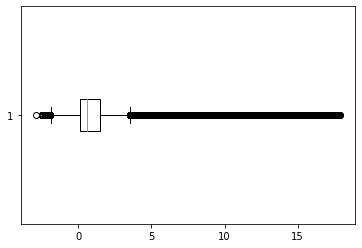

TAG_SONDA_PB1


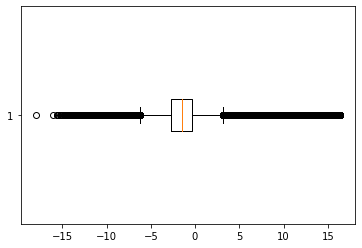

TAG_SONDA_PB2


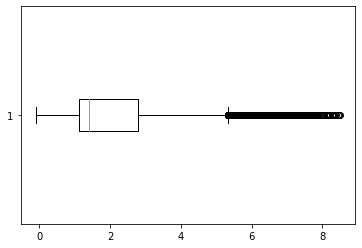

TAG_PRESION_SATURACION


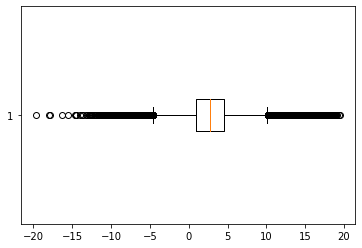

TAG_TEMP_ASPIRACION


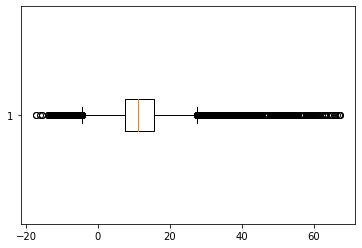

TAG_RECALENT_VALVULA


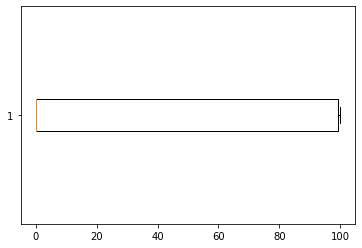

TAG_APERT_VALVULA


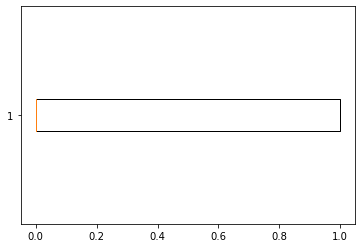

TAG_PETICION_FRIO


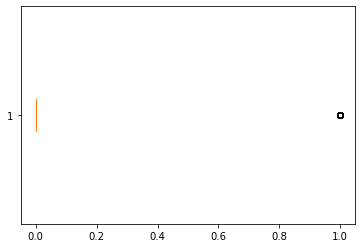

TAG_DESCARCHE


In [35]:
#load the colums in a dataframe
cols=list(df_Variables.columns)

# Drawing the plots
i=2
while i <= (len(cols) - 3):
        
    plt.boxplot(df_Variables[cols[i]].dropna(), vert=False)
    
    plt.show()
    
      

#    plt.pause(0.001)

    # add to iteration counter
    i += 1

    print(cols[i-1])

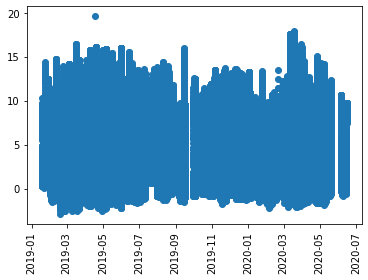

TAG_SONDA_PB1


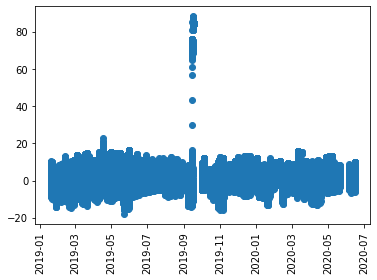

TAG_SONDA_PB2


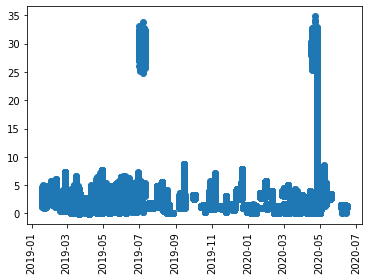

TAG_PRESION_SATURACION


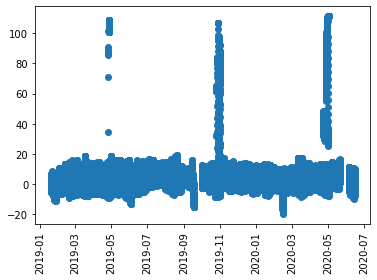

TAG_TEMP_ASPIRACION


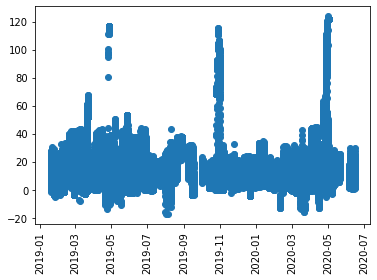

TAG_RECALENT_VALVULA


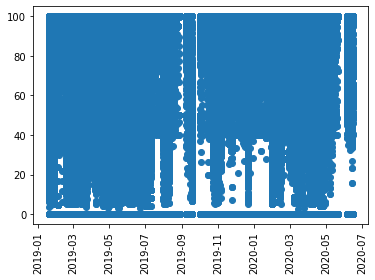

TAG_APERT_VALVULA


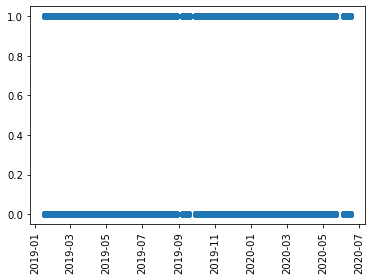

TAG_PETICION_FRIO


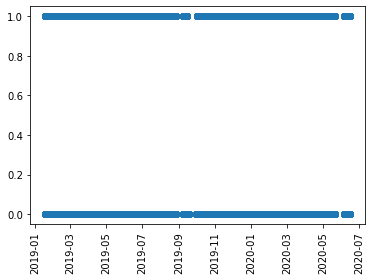

TAG_DESCARCHE


In [36]:
import os
# Draw the plot_date with 
#mask = df_Variables.loc[(df_Variables['TS'] > '2019-07-11 00:00:00') & (df_Variables['TS'] <= '2019-07-11 23:00:00')]
#mask= mask.loc[(mask['ELEMENT'] == (elements[j]))]
#mask['TAG_SONDA_PB1'] = mask['TAG_SONDA_PB1'].interpolate()

mask = df_Variables
mask = mask.sort_values('TS')

plt.xticks(rotation=90)

#load the colums in a dataframe
cols=list(df_Variables.columns)

#Path
#mypath= os.path.abspath(__file__)
mypath = os.getcwd()

# Drawing the plots
i=2
while i <= (len(cols) - 3):
        
#    plt.plot_date(df_Variables[cols[i]].dropna(), vert=False)
    plt.plot_date(mask['TS'], mask[cols[i]])
    plt.xticks(rotation=90)
    plt.savefig(mypath + '/Variable Analysis Graphs/PlotDate_' + cols[i] + '_withoutliers.png')    
    plt.show()
    print(cols[i])
    # add to iteration counter
    i += 1

    

In [12]:
# Resumen de estadística descriptiva:
df_Variables['TAG_APERT_VALVULA'].describe()

count    3.863669e+07
mean     5.252416e+01
std      4.183083e+01
min      0.000000e+00
25%      0.000000e+00
50%      6.490000e+01
75%      9.470000e+01
max      1.000000e+02
Name: TAG_APERT_VALVULA, dtype: float64

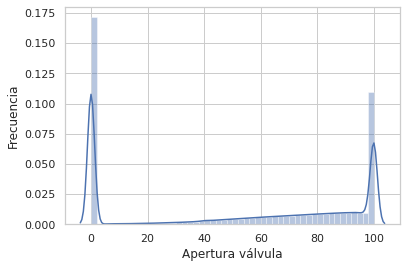

In [13]:
# Histograma:
sns.set_theme(style="whitegrid");
sns.distplot(df_Variables['TAG_APERT_VALVULA']);
plt.xlabel("Apertura válvula");
plt.ylabel("Frecuencia");
#plt.savefig("TAG_APERT_VALULVA_histograma")

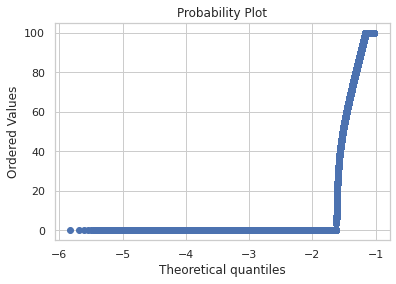

In [14]:
# gráfico de probabilidad normal:
sns.set_theme(style="whitegrid");
res = stats.probplot(df_Variables['TAG_APERT_VALVULA'], plot = plt);
#plt.savefig("TAG_APERT_VALULVA_Graf probabilidad")

In [15]:
# Distribución de frecuencias
contenedores=np.arange(10,100,20);
frec = pd.cut(df_Variables['TAG_APERT_VALVULA'], contenedores);
tabla_frec = pd.value_counts(frec)
tabla_frec

(70, 90]    6526191
(50, 70]    4484882
(30, 50]    2194488
(10, 30]     679523
Name: TAG_APERT_VALVULA, dtype: int64

In [16]:
# Asimetría y curtosis:
print("Skewness: %f" % df_Variables['TAG_APERT_VALVULA'].skew())
print("Kurtosis: %f" % df_Variables['TAG_APERT_VALVULA'].kurt())

Skewness: -0.237837
Kurtosis: -1.658316


Text(0.5, 1.0, 'Diagrama de cajas: Apertura de válvula')

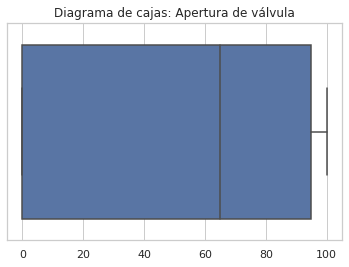

In [17]:
# Diagrama de cajas:
sns.set_theme(style="whitegrid");
sns.boxplot(list(df_Variables['TAG_APERT_VALVULA']))
plt.title("Diagrama de cajas: Apertura de válvula")

<AxesSubplot:>

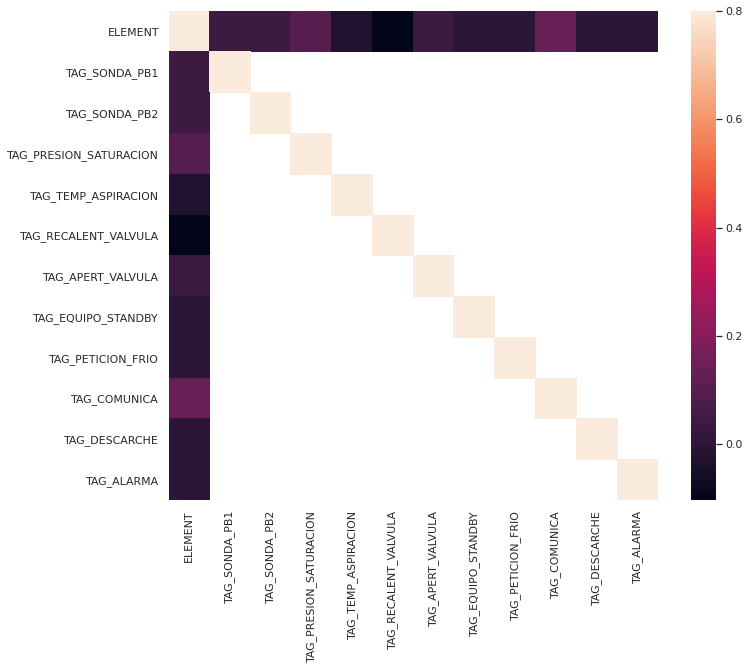

In [18]:
# Matriz de correlación (mapa de calor):
df_Variables['TAG_APERT_VALVULA'].dropna().unique()
corrmat = df_Variables.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

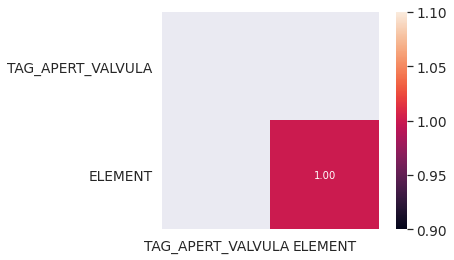

In [19]:
# Matriz de correlación
k = 12 # Número de variables.
cols = corrmat.nlargest(k, 'TAG_APERT_VALVULA')['TAG_APERT_VALVULA'].index
cm = np.corrcoef(df_Variables[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10}, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

In [20]:
# Matriz de correlación
corr = df_Variables.corr()
corr[['TAG_APERT_VALVULA']].sort_values(by = 'TAG_APERT_VALVULA',ascending = False).style.background_gradient()

,TAG_APERT_VALVULA
TAG_APERT_VALVULA,1.000000
ELEMENT,0.034005
TAG_SONDA_PB1,nan
TAG_SONDA_PB2,nan
TAG_PRESION_SATURACION,nan
TAG_TEMP_ASPIRACION,nan
TAG_RECALENT_VALVULA,nan
TAG_EQUIPO_STANDBY,nan
TAG_PETICION_FRIO,nan
TAG_COMUNICA,nan


In [21]:
###################################################

In [22]:
# Resumen de estadística descriptiva:
df_Variables['TAG_SONDA_PB1'].describe()

count    3.208890e+07
mean     1.287077e+00
std      2.254337e+00
min     -3.700000e+00
25%     -1.000000e-01
50%      8.000000e-01
75%      1.500000e+00
max      2.560000e+01
Name: TAG_SONDA_PB1, dtype: float64

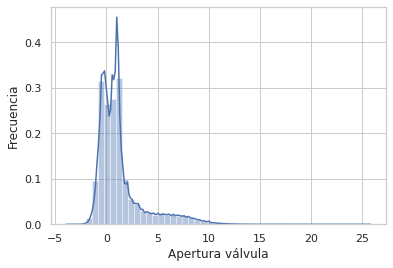

In [23]:
# Histograma:
sns.set_theme(style="whitegrid");
sns.distplot(df_Variables['TAG_SONDA_PB1']);
plt.xlabel("Apertura válvula");
plt.ylabel("Frecuencia");
#plt.savefig("TAG_SONDA_PB1_histograma")

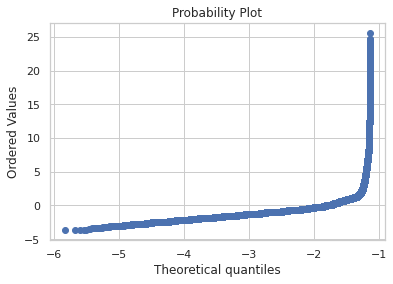

In [24]:
# gráfico de probabilidad normal:
sns.set_theme(style="whitegrid");
res = stats.probplot(df_Variables['TAG_SONDA_PB1'], plot = plt);
#plt.savefig("TAG_SONDA_PB1_Graf probabilidad")

In [25]:
# Distribución de frecuencias
contenedores=np.arange(10,100,20);
frec = pd.cut(df_Variables['TAG_SONDA_PB1'], contenedores);
tabla_frec = pd.value_counts(frec)
tabla_frec

(10, 30]    180303
(70, 90]         0
(50, 70]         0
(30, 50]         0
Name: TAG_SONDA_PB1, dtype: int64

In [26]:
# Asimetría y curtosis:
print("Skewness: %f" % df_Variables['TAG_SONDA_PB1'].skew())
print("Kurtosis: %f" % df_Variables['TAG_SONDA_PB1'].kurt())

Skewness: 2.014539
Kurtosis: 4.339741


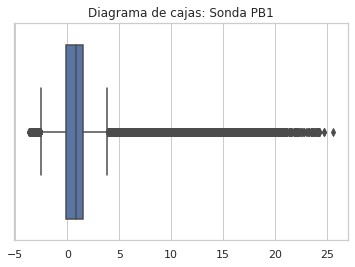

In [27]:
# Diagrama de cajas:
sns.set_theme(style="whitegrid");
sns.boxplot(list(df_Variables['TAG_SONDA_PB1']));
plt.title("Diagrama de cajas: Sonda PB1");

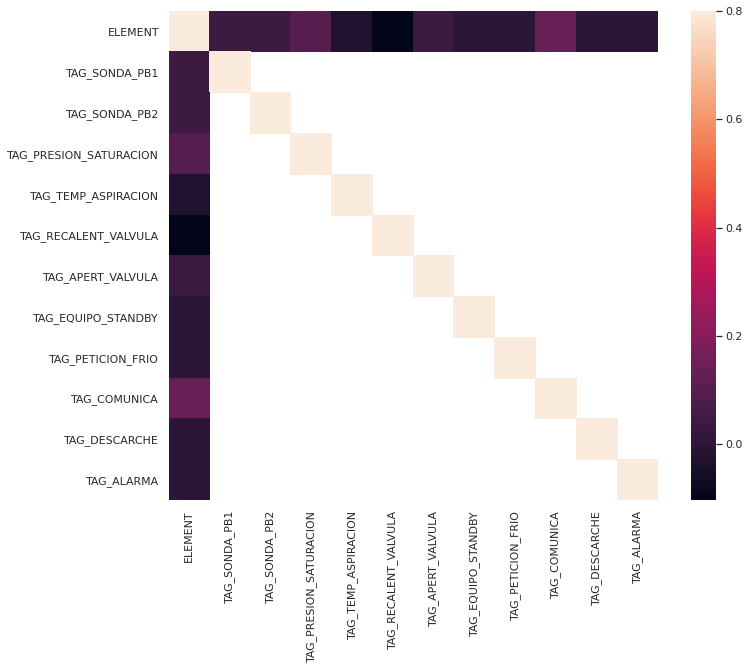

In [28]:
# Matriz de correlación (mapa de calor):
df_Variables['TAG_SONDA_PB1'].dropna().unique()
corrmat = df_Variables.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

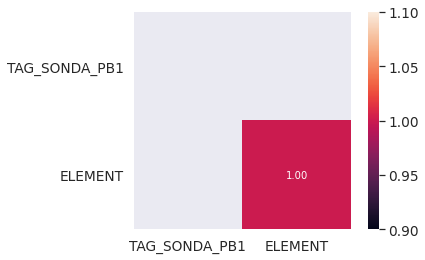

In [29]:
# Matriz de correlación
k = 12 # Número de variables.
cols = corrmat.nlargest(k, 'TAG_SONDA_PB1')['TAG_SONDA_PB1'].index
cm = np.corrcoef(df_Variables[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10}, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

In [30]:
# Matriz de correlación
corr = df_Variables.corr()
corr[['TAG_SONDA_PB1']].sort_values(by = 'TAG_SONDA_PB1',ascending = False).style.background_gradient()

,TAG_SONDA_PB1
TAG_SONDA_PB1,1.000000
ELEMENT,0.043082
TAG_SONDA_PB2,nan
TAG_PRESION_SATURACION,nan
TAG_TEMP_ASPIRACION,nan
TAG_RECALENT_VALVULA,nan
TAG_APERT_VALVULA,nan
TAG_EQUIPO_STANDBY,nan
TAG_PETICION_FRIO,nan
TAG_COMUNICA,nan


In [31]:
##############################################

In [32]:
# Resumen de estadística descriptiva:
df_Variables['TAG_SONDA_PB2'].describe()

count    4.959586e+07
mean    -1.767519e+00
std      2.899452e+00
min     -5.240000e+01
25%     -3.300000e+00
50%     -1.800000e+00
75%     -4.000000e-01
max      1.124000e+02
Name: TAG_SONDA_PB2, dtype: float64

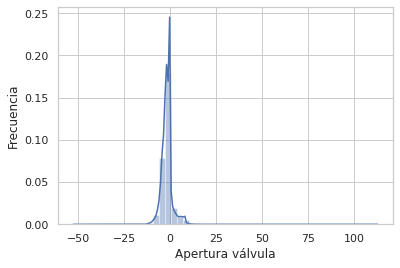

In [33]:
# Histograma:
sns.set_theme(style="whitegrid");
sns.distplot(df_Variables['TAG_SONDA_PB2']);
plt.xlabel("Apertura válvula");
plt.ylabel("Frecuencia");
#plt.savefig("TAG_SONDA_PB2_histograma")

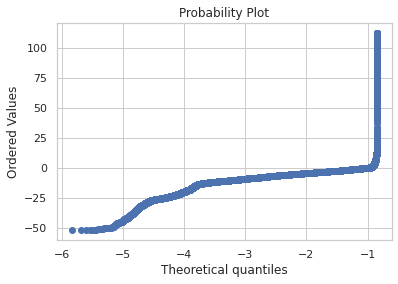

In [34]:
# gráfico de probabilidad normal:
sns.set_theme(style="whitegrid");
res = stats.probplot(df_Variables['TAG_SONDA_PB2'], plot = plt);
#plt.savefig("TAG_SONDA_PB2_Graf probabilidad")

In [35]:
# Distribución de frecuencias
contenedores=np.arange(10,100,20);
frec = pd.cut(df_Variables['TAG_SONDA_PB2'], contenedores);
tabla_frec = pd.value_counts(frec)
tabla_frec

(10, 30]    61508
(70, 90]      567
(50, 70]      126
(30, 50]       42
Name: TAG_SONDA_PB2, dtype: int64

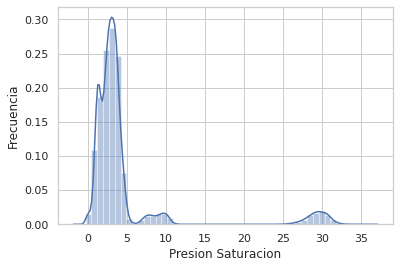

In [36]:
# Histograma:
sns.set_theme(style="whitegrid");
sns.distplot(df_Variables['TAG_PRESION_SATURACION']);
plt.xlabel("Presion Saturacion");
plt.ylabel("Frecuencia");
#plt.savefig("TAG_SONDA_PB1_histograma")

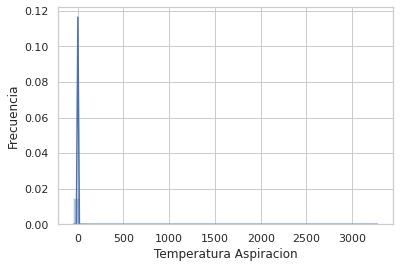

In [37]:
# Histograma:
sns.set_theme(style="whitegrid");
sns.distplot(df_Variables['TAG_TEMP_ASPIRACION']);
plt.xlabel("Temperatura Aspiracion");
plt.ylabel("Frecuencia");
#plt.savefig("TAG_SONDA_PB1_histograma")

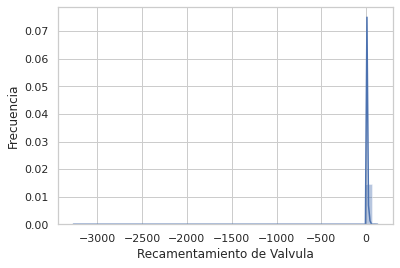

In [38]:
# Histograma:
sns.set_theme(style="whitegrid");
sns.distplot(df_Variables['TAG_RECALENT_VALVULA']);
plt.xlabel("Recamentamiento de Valvula");
plt.ylabel("Frecuencia");
#plt.savefig("TAG_SONDA_PB1_histograma")